# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries for Data Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# For pre-processing the data values in the data set
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler

# To oversample and undersamping the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To impute the missing values
from sklearn.impute import SimpleImputer

# For partitioning the data set to train the model
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

# Metrics to be used in determining the performance of the models appplied on our data set
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve, 
    cohen_kappa_score,
    f1_score,
    accuracy_score,
    precision_score,
    plot_confusion_matrix,
    plot_roc_curve,
    recall_score
)

# Importing different models to fit on the data set
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Hyperparameter tuning
import optuna

# Setting the display Setting of the table
pd.set_option('display.max_columns',None)

from tabulate import tabulate


In [2]:
# Reading the data set
df = pd.read_csv("C:/Users/tanma/Desktop/Sem 1/Machine Learning/ML Project/BankChurners.csv")

In [3]:
# creating a copy of the data set
df1 = df.copy(deep = True)

In [4]:
# Checking the first 5 records in the data set
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [5]:
# checking the info of the data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# removing the first and last columns from the data set
df1 = df1.drop(['CLIENTNUM','Unnamed: 21'], axis=1)

In [7]:
# checking the shape of the data set
print("Total number of rows in the data set = {}".format(df1.shape[0]))
print("Total number of columns in the data set = {}".format(df1.shape[1]))

Total number of rows in the data set = 10127
Total number of columns in the data set = 20


In [8]:
# checking the remaining columns in the data set
pd.DataFrame(data = list(df1.columns))

,0
0,Attrition_Flag
1,Customer_Age
2,Gender
3,Dependent_count
4,Education_Level
5,Marital_Status
6,Income_Category
7,Card_Category
8,Months_on_book
9,Total_Relationship_Count


In [9]:
# checking the percentage of null values in each feature
(df1.isnull().sum()/df1.shape[0])*100

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

**From the above results we could observe that there are no null values present in the data. But we will still try to explore the data in these columns to come to a conclusion.**

In [10]:
# checking the description of the data set for the numerical columns
df1.describe(include = np.number)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
# checking the description of the data set for the categorical columns
df1.describe(include= np.object)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [12]:
# creating list of columns of numerical and categorical type
cat_col = [col for col in df1.select_dtypes(include='object').columns]
num_col = [col for col in df1.select_dtypes(include='number').columns]

In [13]:
# defining a function to check the unique values in each column.
def unique_val(l1):
    for i in l1:
        print(i)
        print('--'*40)
        print(df[i].unique(),'\n')

In [14]:
unique_val(cat_col)

Attrition_Flag
--------------------------------------------------------------------------------
['Existing Customer' 'Attrited Customer'] 

Gender
--------------------------------------------------------------------------------
['M' 'F'] 

Education_Level
--------------------------------------------------------------------------------
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status
--------------------------------------------------------------------------------
['Married' 'Single' 'Unknown' 'Divorced'] 

Income_Category
--------------------------------------------------------------------------------
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 

Card_Category
--------------------------------------------------------------------------------
['Blue' 'Gold' 'Silver' 'Platinum'] 



**Inference: From the above results we could infer that few of the values in columns 'Education_level', 'Marital_Status','Income_Category' have 'Unknown' values.**

In [15]:
unique_val(num_col)

Customer_Age
--------------------------------------------------------------------------------
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27] 

Dependent_count
--------------------------------------------------------------------------------
[3 5 4 2 0 1] 

Months_on_book
--------------------------------------------------------------------------------
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14] 

Total_Relationship_Count
--------------------------------------------------------------------------------
[5 6 4 3 2 1] 

Months_Inactive_12_mon
--------------------------------------------------------------------------------
[1 4 2 3 6 0 5] 

Contacts_Count_12_mon
--------------------------------------------------------------------------------
[3 2 0 1 4 5 6] 

Credit_Limit
------------------------------------------

In [16]:
# Checking the total number of unique values in each column

for col in df1.columns:
    print(col)
    print('---'*30)
    print('Number of unique values in column {} = {}'.format(col,df1[col].nunique()))
    print()

Attrition_Flag
------------------------------------------------------------------------------------------
Number of unique values in column Attrition_Flag = 2

Customer_Age
------------------------------------------------------------------------------------------
Number of unique values in column Customer_Age = 45

Gender
------------------------------------------------------------------------------------------
Number of unique values in column Gender = 2

Dependent_count
------------------------------------------------------------------------------------------
Number of unique values in column Dependent_count = 6

Education_Level
------------------------------------------------------------------------------------------
Number of unique values in column Education_Level = 7

Marital_Status
------------------------------------------------------------------------------------------
Number of unique values in column Marital_Status = 4

Income_Category
---------------------------------------

# Univariate Analysis

## 1. Univariate Analysis of Numerical Features

In [17]:
# Defining a function to know the 5 point summary of each numerical feature in the data set
def num_col_summary(col):
    q1,q2,q3 = df1[col].quantile([0.25,0.50,0.75])
    max_val = max(df1[col])
    min_val = min(df1[col])
    print("5-Point summary of {}\n".format(col))
    print(tabulate(pd.DataFrame(data = {'Min':min_val,'Q1':q1,'Q2':q2,'Q3':q3,'Max':max_val},index = ['Value']),headers = 'keys',tablefmt = 'psql'))
    print()
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df1[col])
    plt.axvline(df1[col].mean(),color = 'k',label = 'Mean',ls = '--')
    plt.axvline(df1[col].median(),color = 'r',label = 'Median',ls = '--')
    plt.legend()
    plt.title(col+" Density Plot")
    plt.subplot(1,2,2)
    sns.boxplot(df1[col])
    plt.title(col+" Boxplot")
    plt.show()
        

5-Point summary of Customer_Age

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    26 |   41 |   46 |   52 |    73 |
+-------+-------+------+------+------+-------+



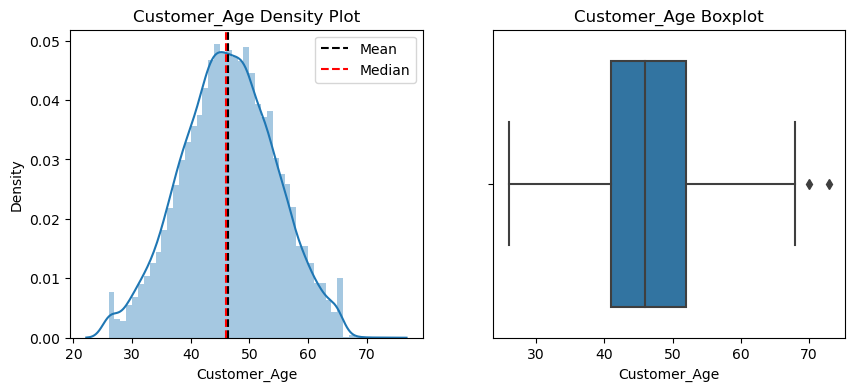

In [18]:
num_col_summary('Customer_Age')

5-Point summary of Dependent_count

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    1 |    2 |    3 |     5 |
+-------+-------+------+------+------+-------+



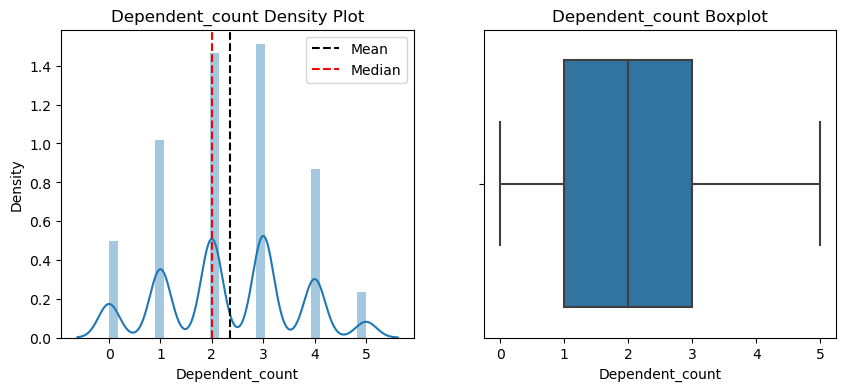

In [19]:
num_col_summary('Dependent_count')

5-Point summary of Months_on_book

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    13 |   31 |   36 |   40 |    56 |
+-------+-------+------+------+------+-------+



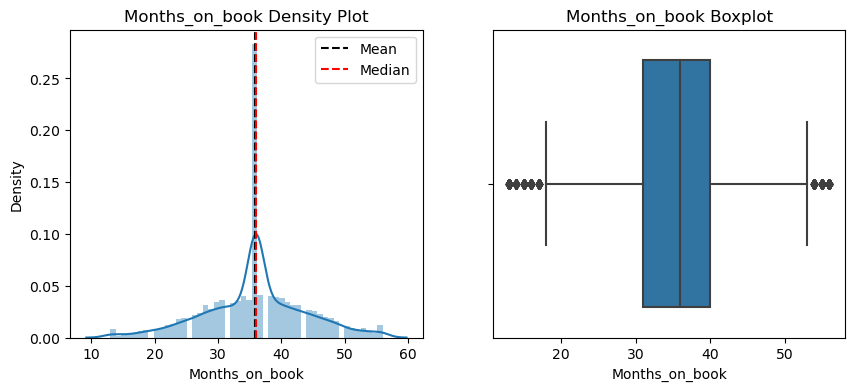

In [20]:
num_col_summary('Months_on_book')

5-Point summary of Total_Relationship_Count

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    3 |    4 |    5 |     6 |
+-------+-------+------+------+------+-------+



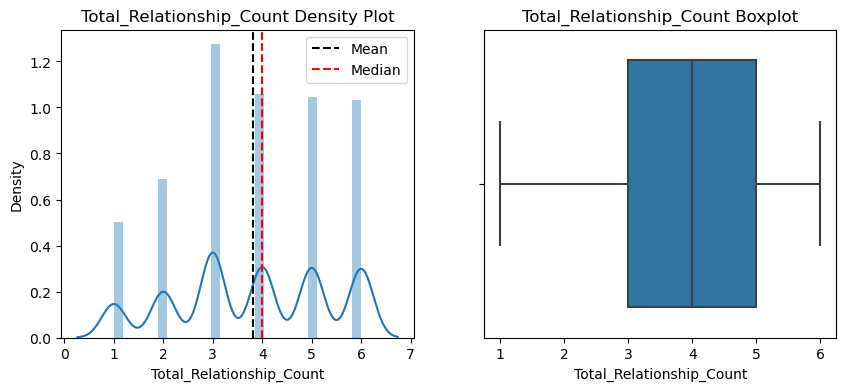

In [21]:
num_col_summary('Total_Relationship_Count')

5-Point summary of Months_Inactive_12_mon

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+



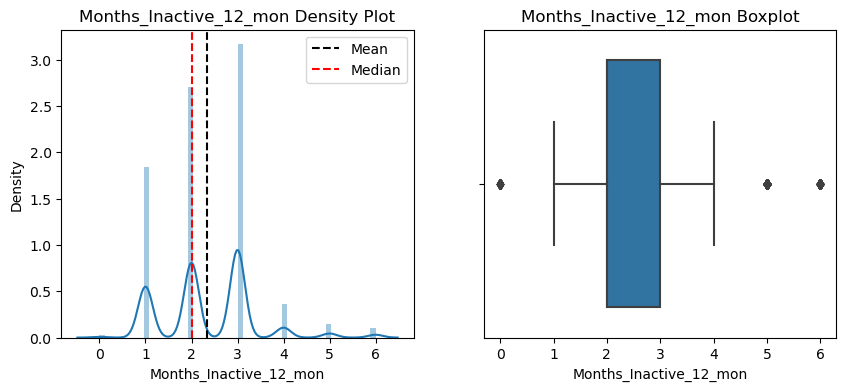

In [22]:
num_col_summary('Months_Inactive_12_mon')

5-Point summary of Contacts_Count_12_mon

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+



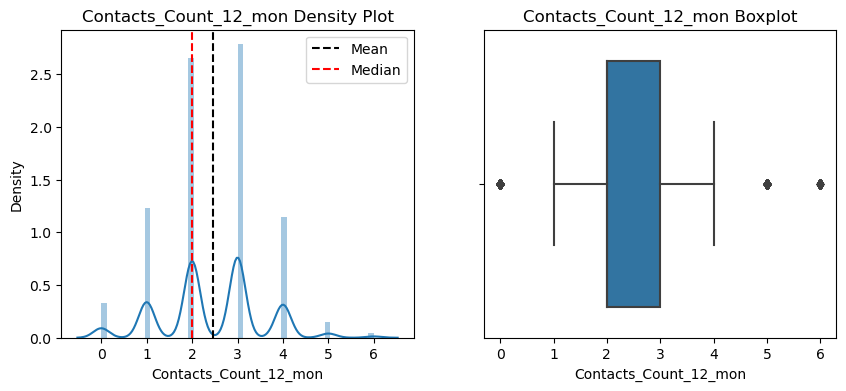

In [23]:
num_col_summary('Contacts_Count_12_mon')

5-Point summary of Credit_Limit

+-------+--------+------+------+---------+-------+
|       |    Min |   Q1 |   Q2 |      Q3 |   Max |
|-------+--------+------+------+---------+-------|
| Value | 1438.3 | 2555 | 4549 | 11067.5 | 34516 |
+-------+--------+------+------+---------+-------+



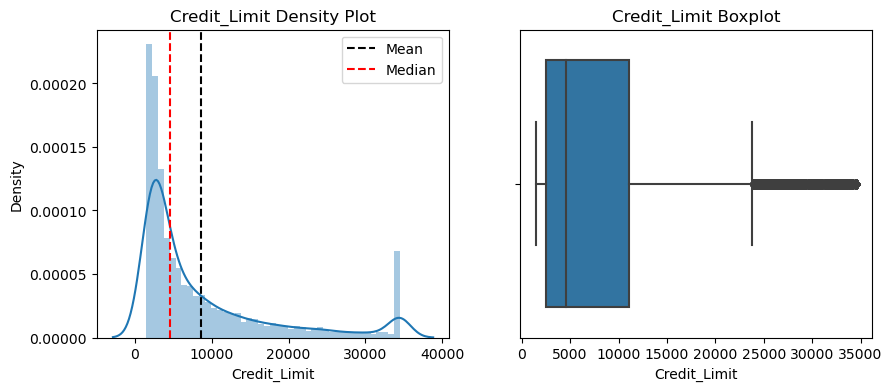

In [24]:
num_col_summary('Credit_Limit')

5-Point summary of Total_Revolving_Bal

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |  359 | 1276 | 1784 |  2517 |
+-------+-------+------+------+------+-------+



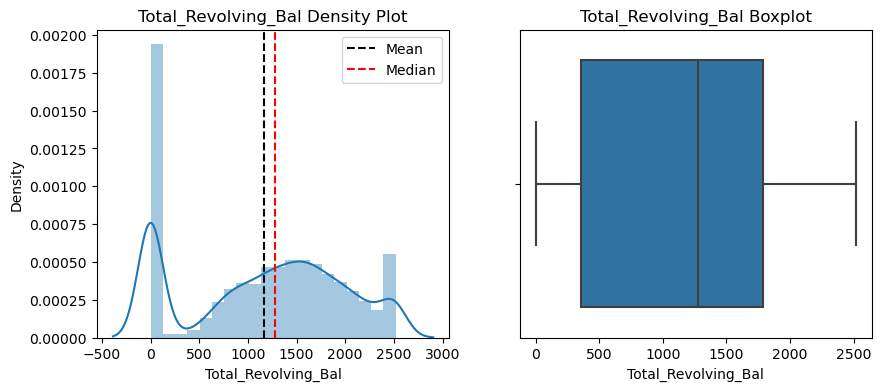

In [25]:
num_col_summary('Total_Revolving_Bal')

5-Point summary of Avg_Open_To_Buy

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |     3 | 1324.5 | 3474 | 9859 | 34516 |
+-------+-------+--------+------+------+-------+



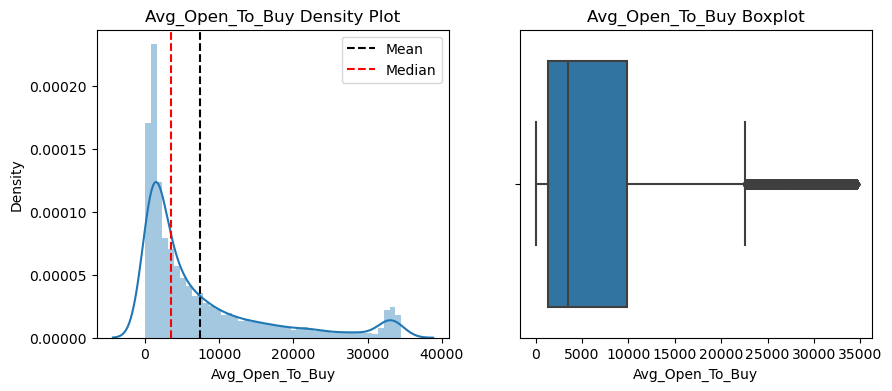

In [26]:
num_col_summary('Avg_Open_To_Buy')

5-Point summary of Total_Amt_Chng_Q4_Q1

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.631 | 0.736 | 0.859 | 3.397 |
+-------+-------+-------+-------+-------+-------+



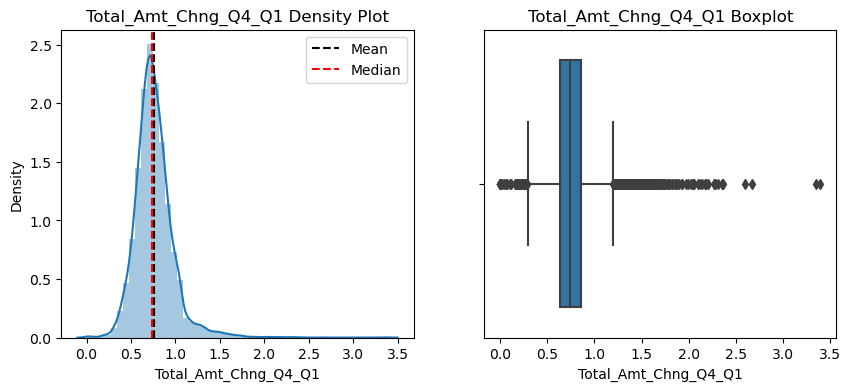

In [27]:
num_col_summary('Total_Amt_Chng_Q4_Q1')

5-Point summary of Total_Trans_Amt

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |   510 | 2155.5 | 3899 | 4741 | 18484 |
+-------+-------+--------+------+------+-------+



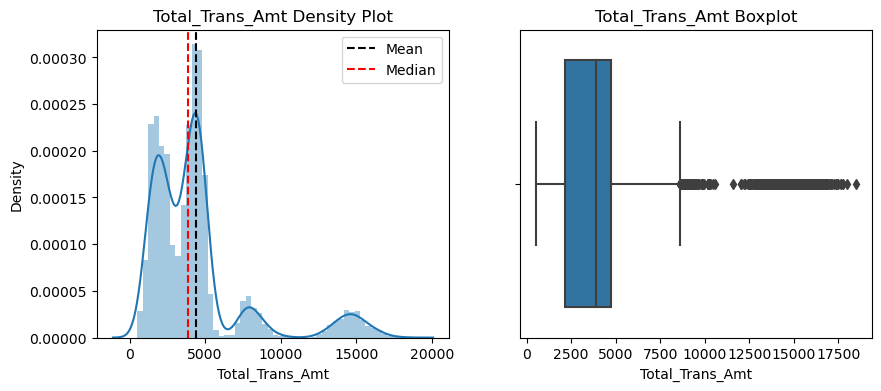

In [28]:
num_col_summary('Total_Trans_Amt')

5-Point summary of Total_Trans_Ct

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    10 |   45 |   67 |   81 |   139 |
+-------+-------+------+------+------+-------+



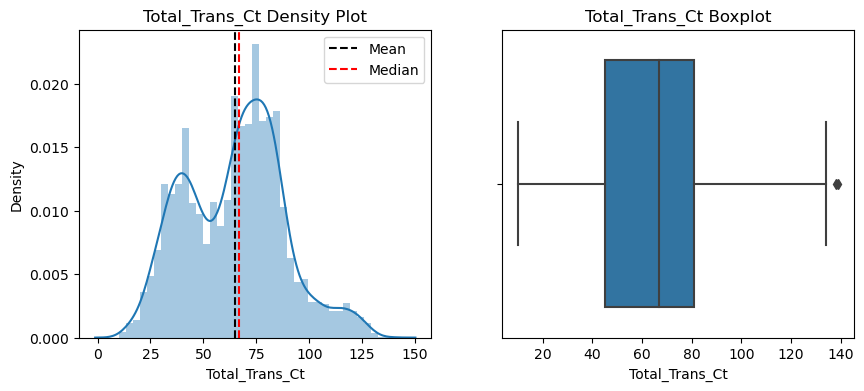

In [29]:
num_col_summary('Total_Trans_Ct')

5-Point summary of Total_Ct_Chng_Q4_Q1

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.582 | 0.702 | 0.818 | 3.714 |
+-------+-------+-------+-------+-------+-------+



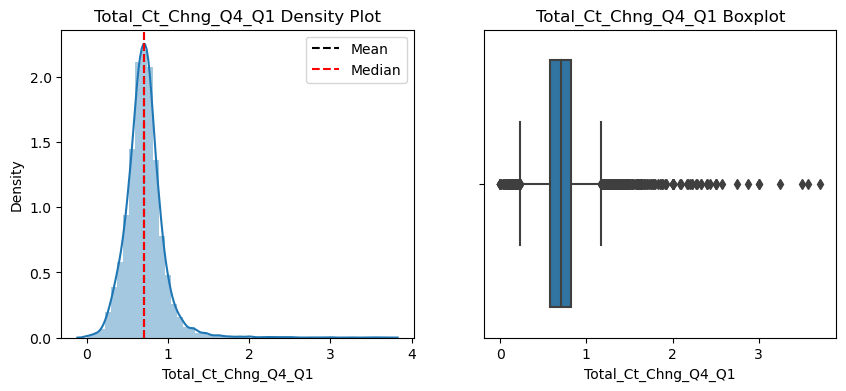

In [30]:
num_col_summary('Total_Ct_Chng_Q4_Q1')

5-Point summary of Avg_Utilization_Ratio

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.023 | 0.176 | 0.503 | 0.999 |
+-------+-------+-------+-------+-------+-------+



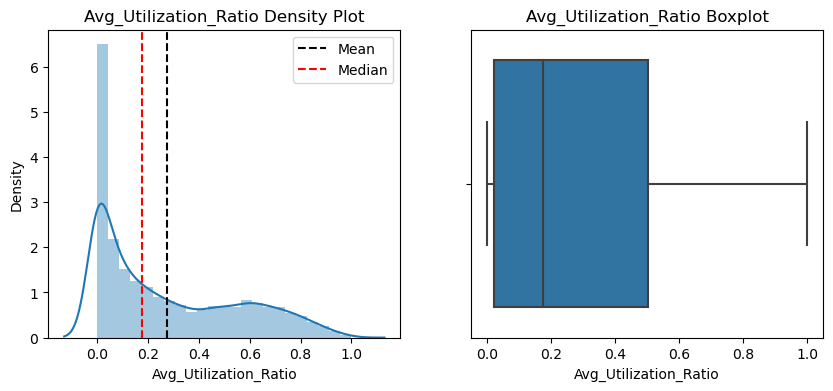

In [31]:
num_col_summary('Avg_Utilization_Ratio')

## 2. Univariate Analysis of Categorical Variables


In [32]:
# checking the distribution of different categories in the categorical features in the dataset
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
        plt.xticks(rotation=45)

def cat_summary(col):
    ax = sns.countplot(col,data = df1)
    without_hue(ax,df1[col])

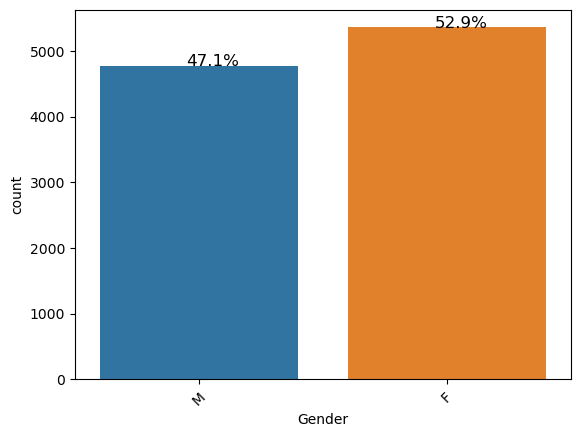

In [33]:
cat_summary('Gender')

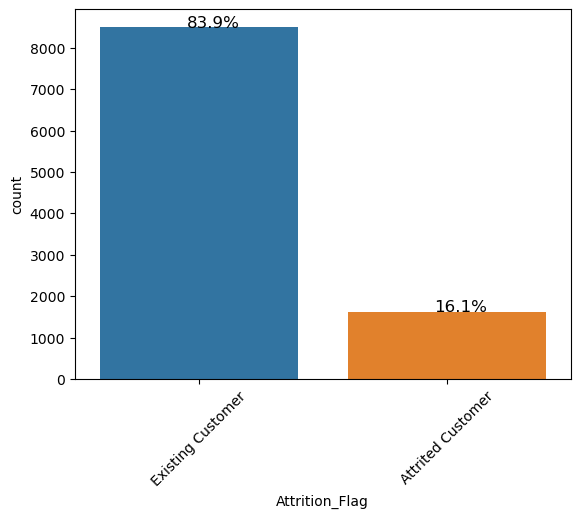

In [34]:
cat_summary('Attrition_Flag')

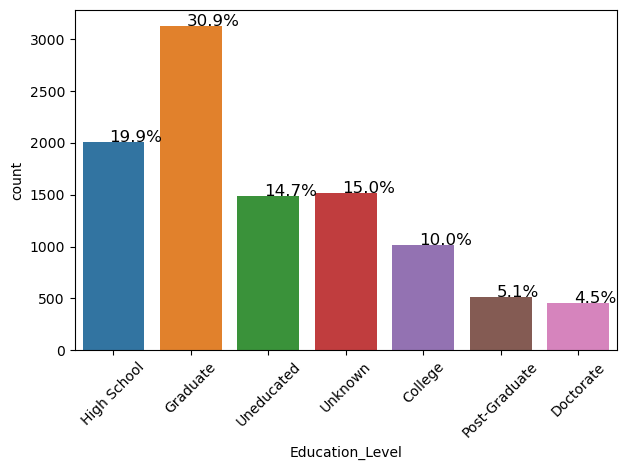

In [35]:
cat_summary('Education_Level')
plt.tight_layout()

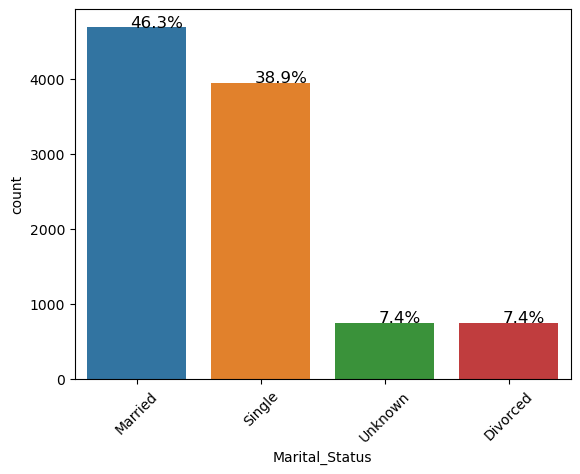

In [36]:
cat_summary('Marital_Status')

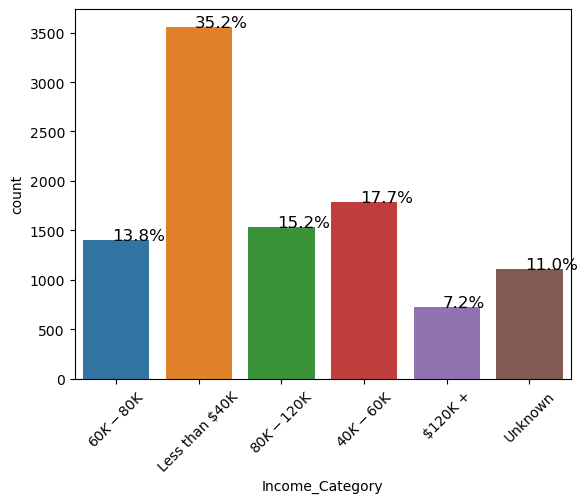

In [37]:
cat_summary('Income_Category')

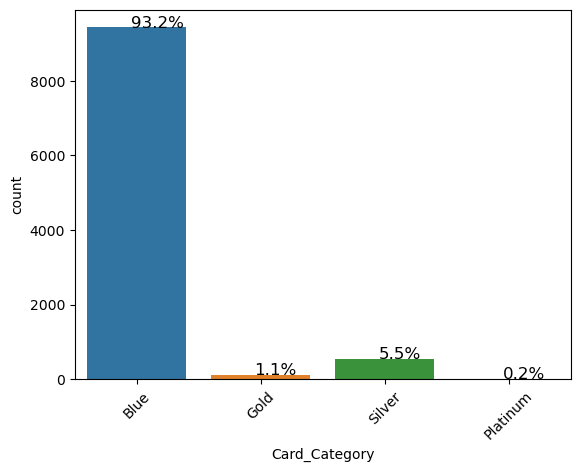

In [38]:
cat_summary('Card_Category')

# Bivariate Analysis

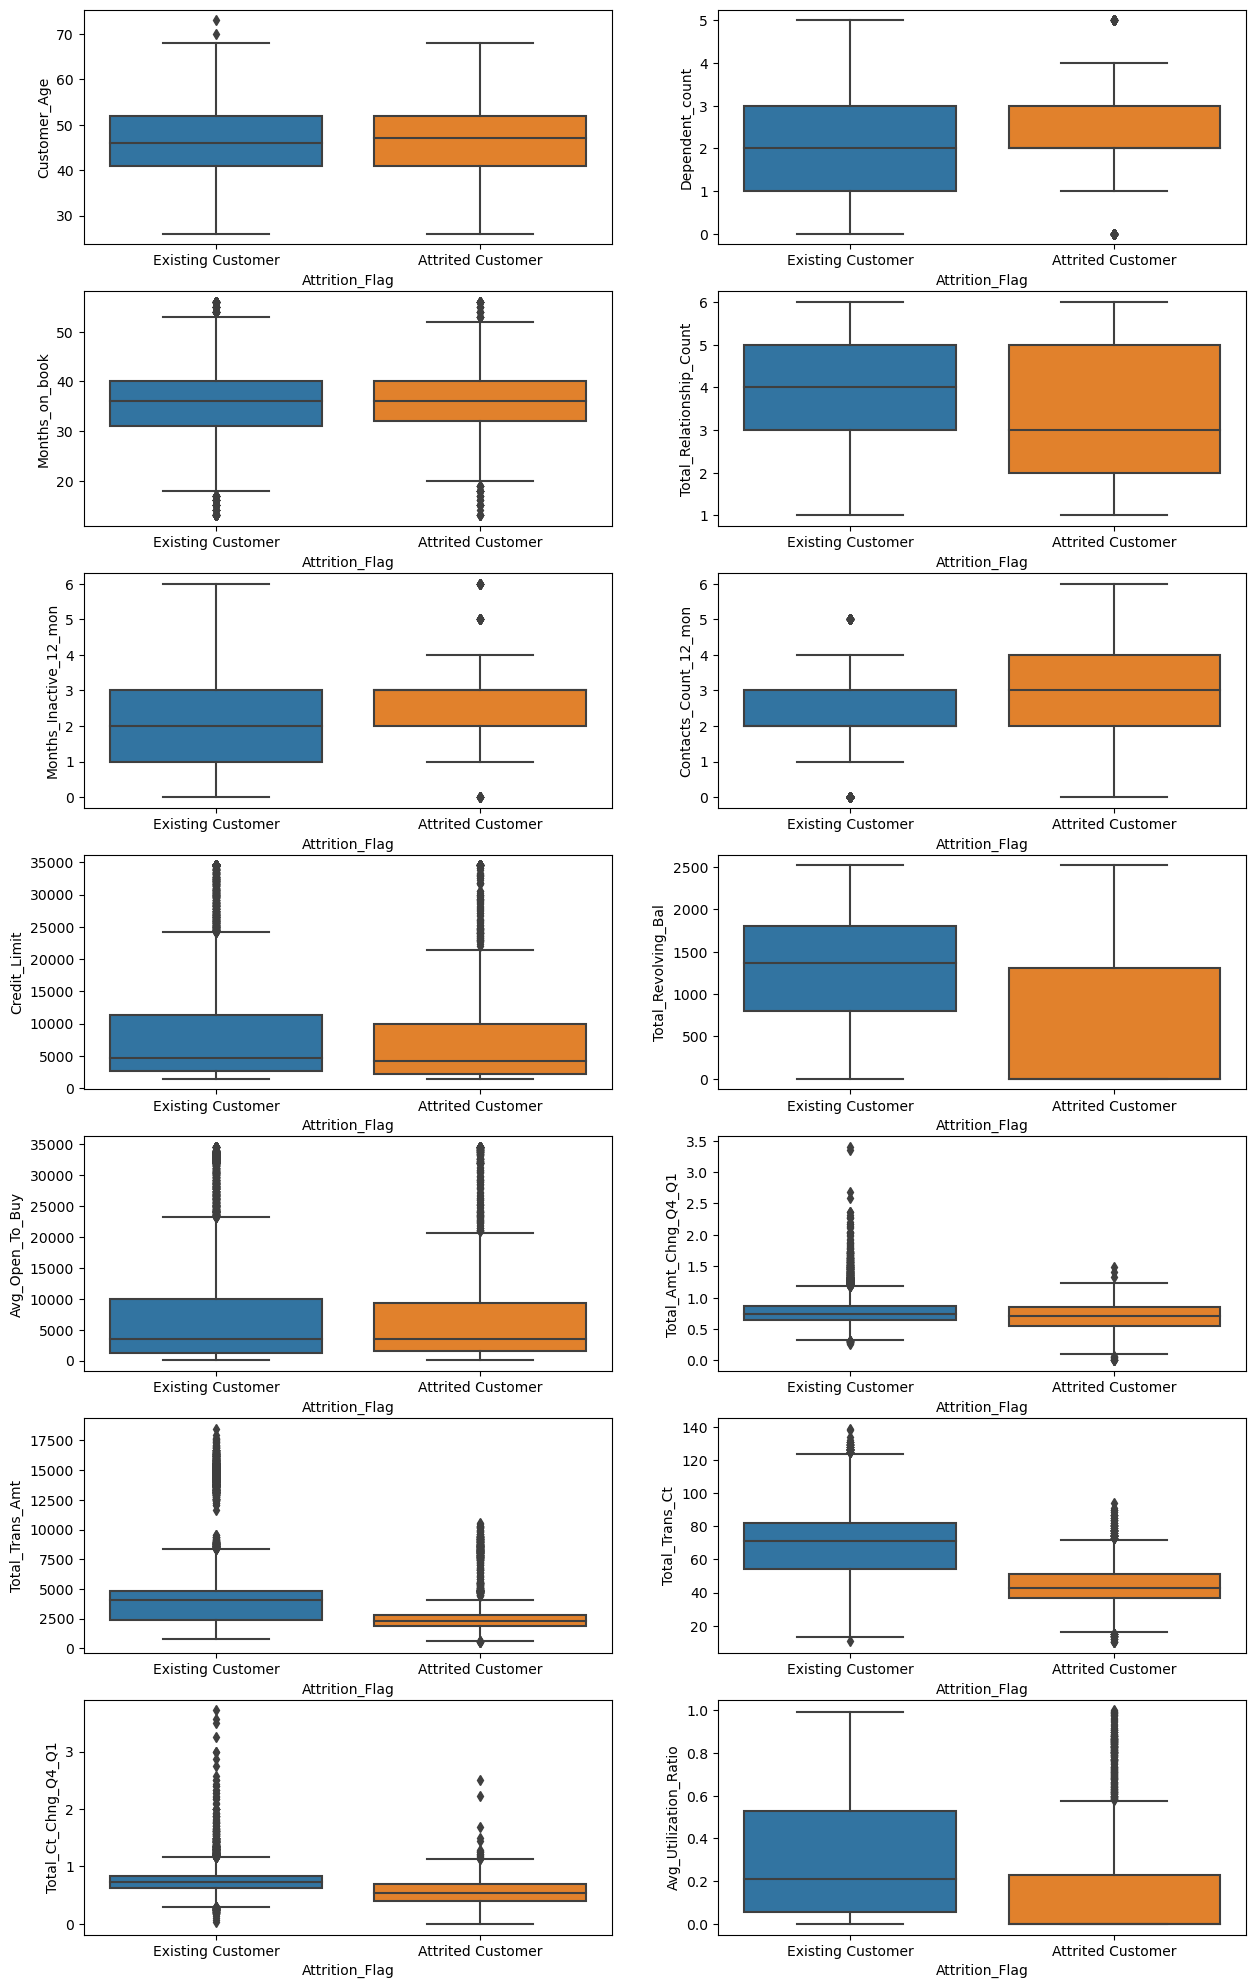

<Figure size 640x480 with 0 Axes>

In [39]:
fig,axes = plt.subplots(int(len(num_col)/2),2,figsize=(15,25),dpi=100)
for idx,col in enumerate(num_col):
    row,col1 = idx//2,idx%2
    sns.boxplot(x='Attrition_Flag',y=col,data=df1,ax = axes[row,col1])
plt.show()
plt.tight_layout()

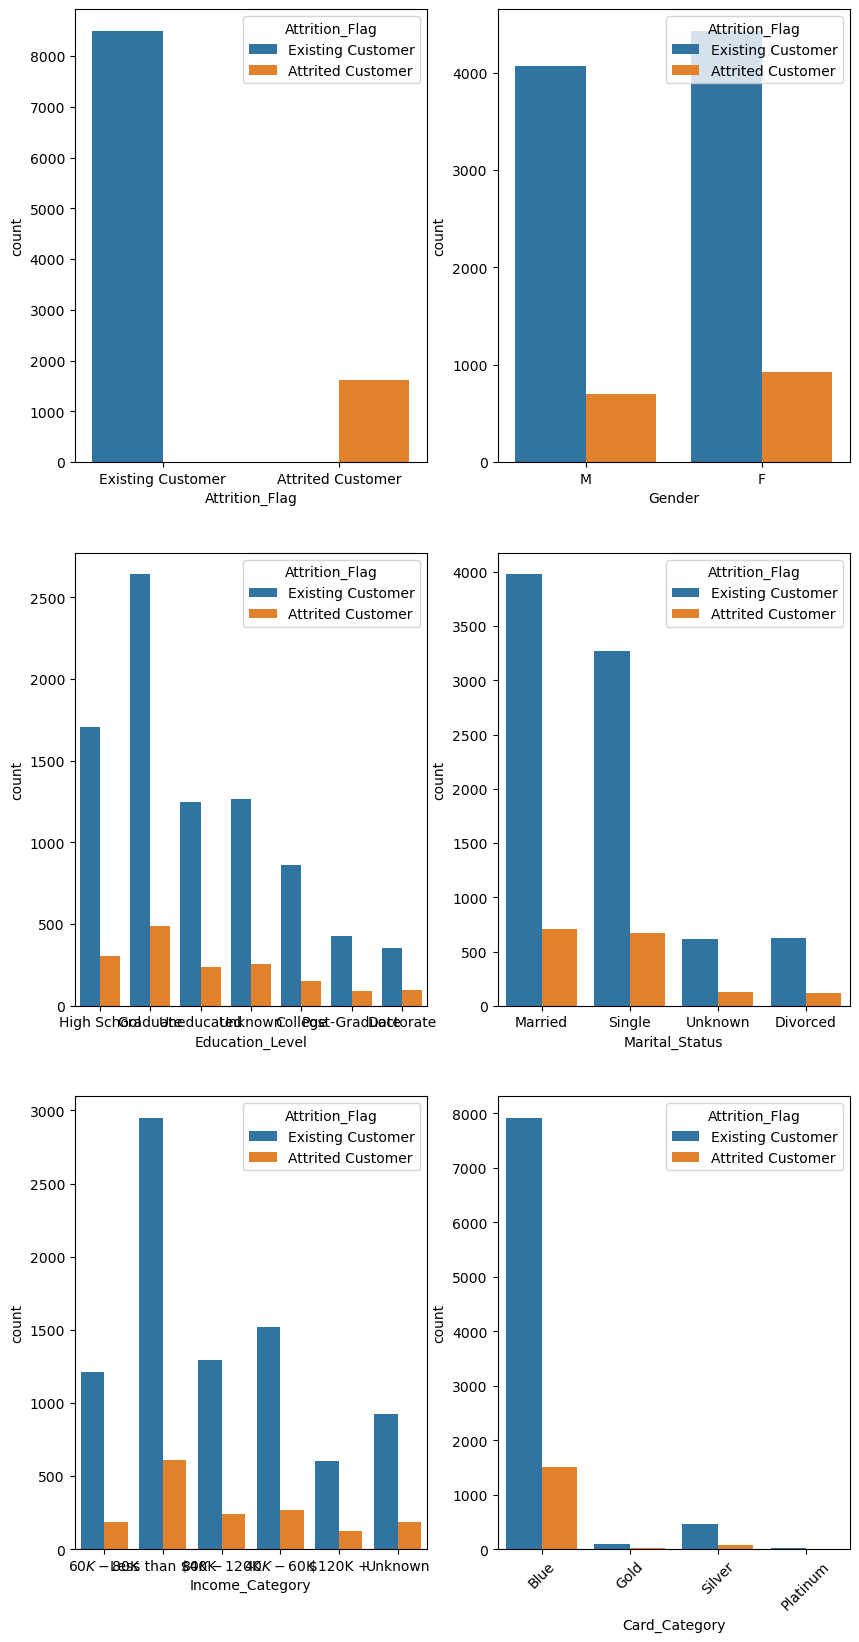

In [40]:
cat_col_n = cat_col.copy()
fig,axes = plt.subplots(3,2,figsize=(10,20),dpi=100)

for idx,col in enumerate(cat_col_n):
    row,col1 = idx//2,idx%2
    sns.countplot(df1[col],hue = df1['Attrition_Flag'],ax=axes[row,col1])
    plt.xticks(rotation=45)

    
    

## Feature Engineering

In [41]:
# Treating the "Unknown" Values in the categorical columns

# Changing the values of Unknown to null values

for col in cat_col:
    df1[col] = df1[col].apply(lambda x: np.nan if x=='Unknown' else x)


In [42]:
# Now checking the percentage of null values
(df1.isnull().sum()/df1.shape[0])*100

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

In [43]:
# Treating the missinkg values in the categorical columns
df1['Marital_Status'] = df1['Marital_Status'].fillna(method = 'ffill')

In [44]:
# Treating the missing values in the Education_level column
df1['Education_Level'] = df1['Education_Level'].fillna(method = 'ffill')

# Treating the missing values in the Income_Category column
df1['Income_Category'] = df1['Income_Category'].fillna(method = 'ffill')

In [45]:
df1.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Encoding the data in the categorical Features

In [46]:
# encoding the data of the target feature in the data set
df1['Attrition_Flag'] = df1['Attrition_Flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)

<AxesSubplot:>

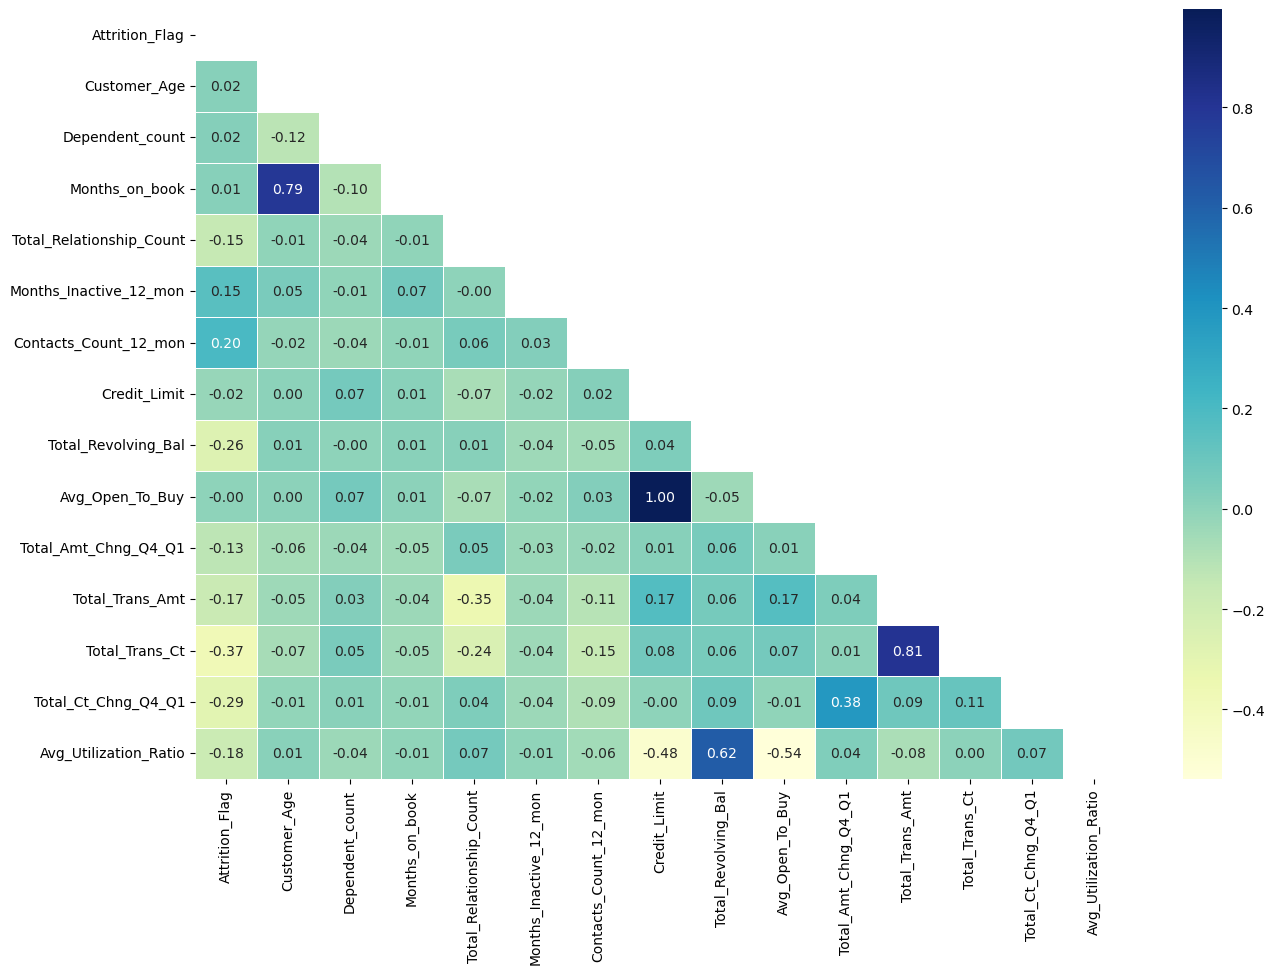

In [47]:
# Checking the correlation of different features with the target variable
plt.figure(figsize = (15,10))
mask = np.zeros_like(df1.corr(),dtype = np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df1.corr(),linewidths = 0.5, annot=True,fmt = '.2f', cmap = 'YlGnBu', mask = mask)

1. From the above graph we can see that Avg_Open_To_Buy and credit limit are perfectly correlated
2. Avg_Open_To_Buy is not correlated to Attrition Flag. Thus we will drop this column.
3. we can observe from the above heatmap that there is no strong correlation between the independent features with our Target Feature, that is, Attrition_Flag

In [48]:
# removing the columns having correlation coefficient value < 0.1 with respect to Attrition_Flag feature
df1 = df1.drop(['Avg_Open_To_Buy','Customer_Age','Dependent_count','Months_on_book','Credit_Limit'],axis=1)

In [49]:
df1.select_dtypes(include = 'object').columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

**We will encode the categorical features in two ways:**
    
    - Label encoding: If the categories in the feature being encoded is ordinal in nature
    - One Hot Encoding: If the categories in the feature may or may not be ordinal

In [50]:
# encoding the gender feature

df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x=='M' else 0)

In [51]:
# checking the encoded 'Gender' feature in the data set
df1['Gender'].unique()

array([1, 0], dtype=int64)

In [52]:
# Label Encoding the ordinal categorical features: 'Education_Level'
df1['Education_Level'] = df1['Education_Level'].replace({'High School':1,'Graduate':3,'Uneducated':0,'College':2,'Post-Graduate':4,'Doctorate':5})

In [53]:
# Label Encoding of Categories in Income_Category
df1['Income_Category'] = df1['Income_Category'].replace({'$60K - $80K':2,'Less than $40K':0,'$80K - $120K':3,'$40K - $60K':1,'$120K +':4})

In [54]:
df2 = pd.get_dummies(data = df1, columns = ['Marital_Status','Card_Category'],drop_first = True)

In [55]:
df2.head()

,Attrition_Flag,Gender,Education_Level,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,1,2,5,1,3,777,1.335,1144,42,1.625,0.061,1,0,0,0,0
1,0,0,3,0,6,1,2,864,1.541,1291,33,3.714,0.105,0,1,0,0,0
2,0,1,3,3,4,1,0,0,2.594,1887,20,2.333,0.000,1,0,0,0,0
3,0,0,1,0,3,4,1,2517,1.405,1171,20,2.333,0.760,1,0,0,0,0
4,0,1,0,2,5,1,0,0,2.175,816,28,2.500,0.000,1,0,0,0,0


<AxesSubplot:>

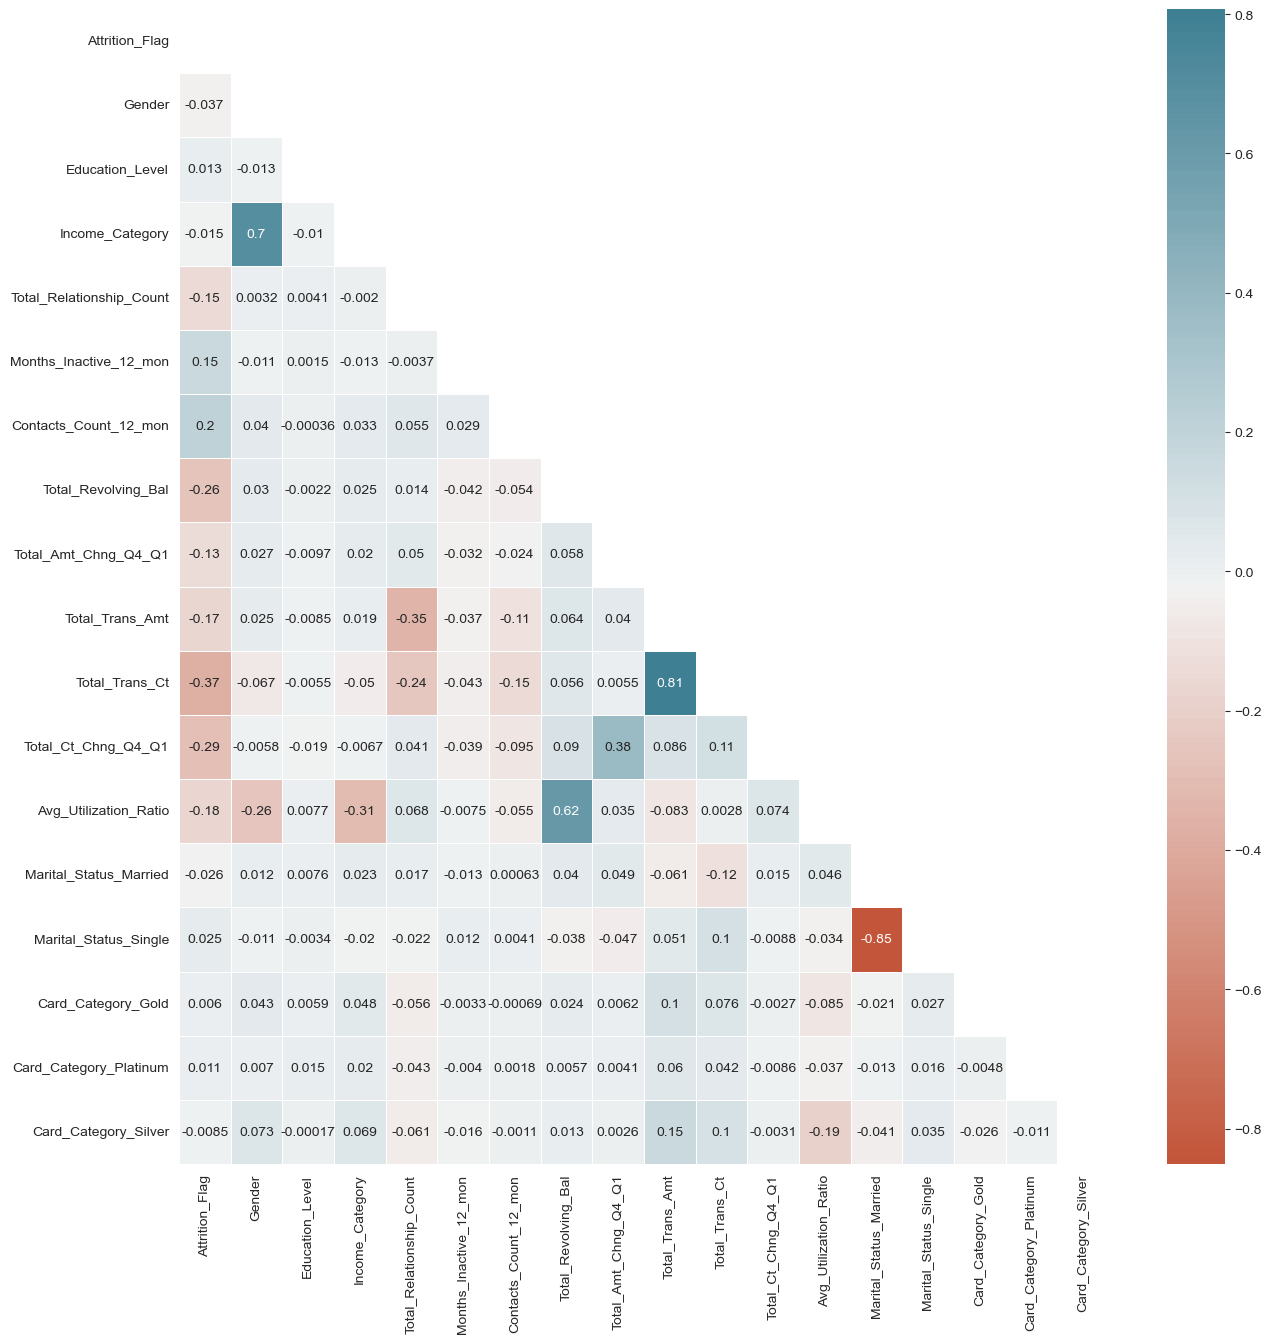

In [56]:
# checking the correlation of different features in the data set to each other
plt.style.use('ggplot')
sns.set_style('whitegrid')
corr = df2.corr()
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,15))
sns.heatmap(corr,annot=True,linewidths = 0.5,cmap = sns.diverging_palette(20,220,n=200),mask = mask)

In [57]:
corr['Attrition_Flag']

Attrition_Flag              1.000000
Gender                     -0.037272
Education_Level             0.013450
Income_Category            -0.014545
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Total_Revolving_Bal        -0.263053
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
Marital_Status_Married     -0.026107
Marital_Status_Single       0.025349
Card_Category_Gold          0.005973
Card_Category_Platinum      0.010823
Card_Category_Silver       -0.008467
Name: Attrition_Flag, dtype: float64

<AxesSubplot:>

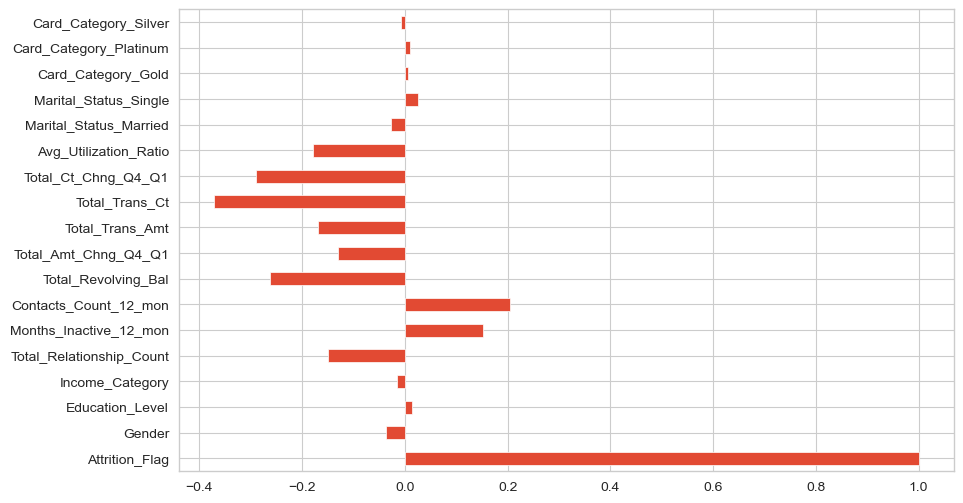

In [58]:
corr['Attrition_Flag'].plot.barh(figsize = (10,6))

In [59]:
# defining independent and target variables
Y = df2['Attrition_Flag']
X = df2.drop('Attrition_Flag',axis=1)

In [60]:
# Splitting the data set into temporary and test dataset
x_temp,x_test,y_temp,y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42,stratify = Y)

#Splitting the temp data set into train and validation data set
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size = 0.3, random_state = 42, stratify = y_temp)

In [61]:
# Checking the distribution of the Training, Validation and Test Data set

## Checking the shape of each data set
pd.DataFrame({'Rows':[x_train.shape[0],x_val.shape[0],x_test.shape[0]],
              'Columns':[x_train.shape[1],x_val.shape[1],x_test.shape[1]],
              'Y(0)_ratio':[y_train.value_counts(normalize=True)[0],y_val.value_counts(normalize=True)[0],y_test.value_counts(normalize=True)[0]],
              'Y(1)_ratio':[y_train.value_counts(normalize=True)[1],y_val.value_counts(normalize=True)[1],y_test.value_counts(normalize=True)[1]]},
             index=['Train','Validation','Test'])

,Rows,Columns,Y(0)_ratio,Y(1)_ratio
Train,5670,17,0.839330,0.160670
Validation,2431,17,0.839161,0.160839
Test,2026,17,0.839585,0.160415


In [62]:
# scaling the values of all the independent columns using Robust Scaler
num_col_2 = ["Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"]
rc = RobustScaler(with_centering=False,with_scaling=True)
x_train[num_col_2] = pd.DataFrame(rc.fit_transform(x_train[num_col_2]),columns = num_col_2,index = x_train.index)
x_val[num_col_2] = pd.DataFrame(rc.fit_transform(x_val[num_col_2]),columns = num_col_2,index = x_val.index)
x_test[num_col_2] = pd.DataFrame(rc.fit_transform(x_test[num_col_2]),columns = num_col_2,index = x_test.index)

In [63]:
# Creating a function to calculate the different performance metrics on train, validation and test data sets

def get_metrics(model, train_x, test_x, train_y, test_y, threshold=0.5, flag=False, roc=True):
    metrics_list = []
    
    train_pred = model.predict_proba(train_x)[:,1]>threshold
    test_pred = model.predict_proba(test_x)[:,1]>threshold
    
    train_pred = np.round(train_pred)
    test_pred = np.round(test_pred)

    train_acc = accuracy_score(train_y,train_pred)
    test_acc = accuracy_score(test_y,test_pred)
    
    train_prec = precision_score(train_y,train_pred)
    test_prec = precision_score(test_y,test_pred)
    
    train_recall = recall_score(train_y,train_pred)
    test_recall = recall_score(test_y,test_pred)
    
    train_f1 = f1_score(train_y,train_pred)
    test_f1 = f1_score(test_y,test_pred)
    
    train_pred_prob = model.predict_proba(train_x)[:,1]
    test_pred_prob = model.predict_proba(test_x)[:,1]
    
    train_roc_auc_score = roc_auc_score(train_y,train_pred_prob)
    test_roc_auc_score = roc_auc_score(test_y,test_pred_prob)
    
    metrics_list.extend([train_acc,
                         test_acc,
                         train_prec,
                         test_prec,
                         train_recall,
                         test_recall,
                         train_f1,
                         test_f1,
                         train_roc_auc_score,
                         test_roc_auc_score])
    
    return metrics_list

# defining a Dicitionary to store the data related to model and different metric values

d1 = {
    'Model_Name':[],
    'Train_Acc':[],
    'Test_Acc':[],
    'Train_Prec':[],
    'Test_Prec':[],
    'Train_Recall':[],
    'Test_Recall':[],
    'Train_F1':[],
    'Test_F1':[],
    'Train_roc_auc':[],
    'Test_roc_auc':[],
    'Train_cv_score':[]
}

# Creating a function to add the metric values to the dictionary for comparision of different models
def add_metric_score(model,score,cv_score):
    d1['Model_Name'].append(model)
    d1['Train_Acc'].append(score[0])
    d1['Test_Acc'].append(score[1])
    d1['Train_Prec'].append(score[2])
    d1['Test_Prec'].append(score[3])
    d1['Train_Recall'].append(score[4])
    d1['Test_Recall'].append(score[5])
    d1['Train_F1'].append(score[6])
    d1['Test_F1'].append(score[7])
    d1['Train_roc_auc'].append(score[8])
    d1['Test_roc_auc'].append(score[9])
    d1['Train_cv_score'].append(cv_score)
    

    
# Fitting different Machine Learning models and storing resultant metric scores for each model
models = []
cv_results = []
models.append(('Logistic Regression',LogisticRegression(random_state = 42)))
models.append(('Decision Tree',DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest',RandomForestClassifier(random_state = 42)))
models.append(('Light GBM', lgb.LGBMClassifier(random_state = 42)))

for name, model in models:
    Kfold = StratifiedKFold(n_splits = 5,random_state=42,shuffle = True)
    metrics = 'recall'
    
    cv_scores = cross_val_score(model, X = x_train, y = y_train,cv=Kfold,scoring=metrics)
    cv_results.append(cv_scores)
    
    model.fit(x_train,y_train)
    metrics_list = get_metrics(model,train_x = x_train,test_x = x_val,train_y = y_train,test_y=y_val)
    add_metric_score(name,metrics_list,cv_scores.mean())
    

pd.DataFrame(d1).sort_values(by = ['Train_cv_score','Test_Recall'],ascending=False).style.highlight_max(color='lightblue',axis=0).highlight_min(color='pink',axis=0)
    

,Model_Name,Train_Acc,Test_Acc,Train_Prec,Test_Prec,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_cv_score
3,Light GBM,0.999647,0.962567,0.997809,0.926136,1.000000,0.833760,0.998904,0.877524,0.999999,0.990803,0.871537
1,Decision Tree,1.000000,0.930070,1.000000,0.804408,1.000000,0.746803,1.000000,0.774536,1.000000,0.856000,0.809007
2,Random Forest,1.000000,0.952694,1.000000,0.920732,1.000000,0.772379,1.000000,0.840056,1.000000,0.984858,0.800234
0,Logistic Regression,0.905115,0.901275,0.765292,0.764912,0.590560,0.557545,0.666667,0.644970,0.925584,0.925001,0.582898


**Inference: From the above results we can observe that the Train_cv_score and Test recall is highest if we use the Light GBM Classifier Algorithm.**

*Thus we will now perform tuning of the Light GBM model and check the feature importances of different features contibuting towards predicting our target feature.*

**While exploring the data earlier, we observed that the data is unevenly distributed if we consider the target feature in the data set. This imbalanced distribution of the target variable in the data set can hamper the predictability of our machine learning model. Thus, to overcome this issue we can use upsampling and downsampling techniques to make our data set balanced and try to fit and compare the performances of the machine learning model.**

In [64]:
# Upsampling the data set with the minority class in the target variable 'Attrition_Flag'

# shape of the data before upsampling
print("Number of rows in the data set = {}".format(x_train.shape[0]))
print("Number of columns in the data set = {}\n".format(x_train.shape[1]))

smt = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=15,n_jobs=4)

x_train_up,y_train_up = smt.fit_resample(x_train,y_train)

# checking the shape of the data set after resampling
print("Number of rows in the oversampled data set = {}".format(x_train_up.shape[0]))
print("Number of columns in the oversampled data set = {}".format(x_train_up.shape[1]))

# checking the number of ylabels initially and after resampling
print("Count of label before resampling:\n")
print(y_train.value_counts())

print("Count of label after resampling:\n")
print(y_train_up.value_counts())

Number of rows in the data set = 5670
Number of columns in the data set = 17

Number of rows in the oversampled data set = 9518
Number of columns in the oversampled data set = 17
Count of label before resampling:

0    4759
1     911
Name: Attrition_Flag, dtype: int64
Count of label after resampling:

0    4759
1    4759
Name: Attrition_Flag, dtype: int64


In [65]:
models_up_sampled = []

models_up_sampled.append(('Logistic Regression (upsampled)',LogisticRegression(random_state=42)))
models_up_sampled.append(('Decision Tree (Upsampled)',DecisionTreeClassifier(random_state=42)))
models_up_sampled.append(('Random Forest (Upsampled)',RandomForestClassifier(random_state=42)))
models_up_sampled.append(('Light GBM (Upsampled)',lgb.LGBMClassifier(random_state=42)))

for name,model in models_up_sampled:
    metrics = 'recall'
    kfold = StratifiedKFold(n_splits = 5,shuffle=True,random_state=42)
    
    cv_results_up = cross_val_score(model,x_train_up,y_train_up,scoring=metrics,cv = kfold,n_jobs=4)
    cv_results.append(cv_results_up)
    
    model.fit(x_train_up,y_train_up)
    metrics_list = get_metrics(model,x_train_up,x_val,y_train_up,y_val)
    add_metric_score(name,metrics_list,cv_results_up.mean())
pd.DataFrame(d1).sort_values(by = ['Train_cv_score','Test_Recall'],ascending=False).style.highlight_max(color='lightblue',axis=0).highlight_min(color='pink',axis=0)

,Model_Name,Train_Acc,Test_Acc,Train_Prec,Test_Prec,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_cv_score
7,Light GBM (Upsampled),0.999054,0.963390,0.998531,0.905914,0.999580,0.861893,0.999055,0.883355,0.999997,0.988927,0.979197
6,Random Forest (Upsampled),1.000000,0.951460,1.000000,0.840399,1.000000,0.861893,1.000000,0.851010,1.000000,0.984026,0.978777
5,Decision Tree (Upsampled),1.000000,0.925545,1.000000,0.745327,1.000000,0.815857,1.000000,0.778999,1.000000,0.881213,0.942847
4,Logistic Regression (upsampled),0.880752,0.851501,0.873300,0.525862,0.890733,0.780051,0.881931,0.628218,0.946075,0.915424,0.890313
3,Light GBM,0.999647,0.962567,0.997809,0.926136,1.000000,0.833760,0.998904,0.877524,0.999999,0.990803,0.871537
1,Decision Tree,1.000000,0.930070,1.000000,0.804408,1.000000,0.746803,1.000000,0.774536,1.000000,0.856000,0.809007
2,Random Forest,1.000000,0.952694,1.000000,0.920732,1.000000,0.772379,1.000000,0.840056,1.000000,0.984858,0.800234
0,Logistic Regression,0.905115,0.901275,0.765292,0.764912,0.590560,0.557545,0.666667,0.644970,0.925584,0.925001,0.582898


**From the above result

In [66]:
# downsampling the train data and applying the machine learning models to the resampled data

rus = RandomUnderSampler(sampling_strategy='majority',random_state = 42)
x_train_down,y_train_down = rus.fit_resample(x_train,y_train)


In [67]:
models_down = []

models_down.append(('Logistic Regression (Down-sampled)',LogisticRegression(random_state=42)))
models_down.append(('Decision Treee (Down-Sampled)',DecisionTreeClassifier(random_state=42)))
models_down.append(('Random Forest (Down-Sampled)',RandomForestClassifier(random_state=42)))
models_down.append(('Light GBM (Down-Sampled)',lgb.LGBMClassifier(random_state=42)))

for name,model in models_down:
    metrics = 'recall'
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    cv_score = cross_val_score(model,x_train_down,y_train_down,scoring=metrics,n_jobs=4,cv=kfold)
    cv_results.append(cv_score)
    
    model.fit(x_train_down,y_train_down)
    metrics_list = get_metrics(model,x_train_down,x_val,y_train_down,y_val)
    add_metric_score(name,metrics_list,cv_score.mean())

pd.DataFrame(d1).sort_values(by = ['Train_cv_score','Test_Recall'],ascending=False).style.highlight_max(color='lightblue',axis=0).highlight_min(color='pink',axis=0)

,Model_Name,Train_Acc,Test_Acc,Train_Prec,Test_Prec,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_cv_score
7,Light GBM (Upsampled),0.999054,0.963390,0.998531,0.905914,0.999580,0.861893,0.999055,0.883355,0.999997,0.988927,0.979197
6,Random Forest (Upsampled),1.000000,0.951460,1.000000,0.840399,1.000000,0.861893,1.000000,0.851010,1.000000,0.984026,0.978777
11,Light GBM (Down-Sampled),1.000000,0.946935,1.000000,0.786026,1.000000,0.920716,1.000000,0.848057,1.000000,0.984679,0.953906
10,Random Forest (Down-Sampled),1.000000,0.935418,1.000000,0.734940,1.000000,0.936061,1.000000,0.823397,1.000000,0.980508,0.949505
5,Decision Tree (Upsampled),1.000000,0.925545,1.000000,0.745327,1.000000,0.815857,1.000000,0.778999,1.000000,0.881213,0.942847
4,Logistic Regression (upsampled),0.880752,0.851501,0.873300,0.525862,0.890733,0.780051,0.881931,0.628218,0.946075,0.915424,0.890313
9,Decision Treee (Down-Sampled),1.000000,0.897162,1.000000,0.630798,1.000000,0.869565,1.000000,0.731183,1.000000,0.886008,0.875944
3,Light GBM,0.999647,0.962567,0.997809,0.926136,1.000000,0.833760,0.998904,0.877524,0.999999,0.990803,0.871537
8,Logistic Regression (Down-sampled),0.853458,0.839161,0.853070,0.500000,0.854007,0.826087,0.853538,0.622951,0.925458,0.920523,0.846376
1,Decision Tree,1.000000,0.930070,1.000000,0.804408,1.000000,0.746803,1.000000,0.774536,1.000000,0.856000,0.809007


In [68]:
# Tuning the Hyperparameters for Random Forest Classifier model using downsampled train data.
from scipy.stats import randint as sp_randint

params = {
    'n_estimators':sp_randint(100,250),
    'max_depth':sp_randint(1,15),
    'min_samples_split':sp_randint(10,50),
    'min_samples_leaf':sp_randint(10,40),
    'max_features':sp_randint(1,21)}

rfc = RandomForestClassifier(random_state=10)

rsearch = RandomizedSearchCV(estimator = rfc,param_distributions=params,scoring='recall',n_iter=500,cv=10,n_jobs=-1,return_train_score=True)
rsearch.fit(x_train_down,y_train_down)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002463B303190>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002463C588DC0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002463B303A30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002463B0B4940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002463C9BDA00>},
                   return_train_score=True, scoring='recall')

In [69]:
best_params = rsearch.best_params_
best_params

{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 11,
 'min_samples_split': 12,
 'n_estimators': 207}

In [70]:
def model_res(algo,x_train = x_train_down,x_test=x_test,y_train = y_train_down,y_test=y_test):
    algo.fit(x_train,y_train)
    y_train_pred = algo.predict(x_train)
    y_test_pred = algo.predict(x_test)
    roc_score = roc_auc_score(y_test,algo.predict_proba(x_test)[:,1])
    print('confusion matrix for train data')
    print(confusion_matrix(y_train,y_train_pred))
    print('Accuracy score = {}'.format(accuracy_score(y_train,y_train_pred)))
    print('roc_auc_score = {}'.format(roc_score))
    print(classification_report(y_train,y_train_pred))
    print('confusion matrix for test data')
    print(confusion_matrix(y_test,y_test_pred))
    print('Accuracy score = {}'.format(accuracy_score(y_test,y_test_pred)))
    print('roc_auc_score = {}'.format(roc_score))
    print(classification_report(y_test,y_test_pred))
    print('Y_test = {} Y_test_pred = {}'.format(y_test,y_test_pred))
    print('Cohen Kappa score = {}'.format(cohen_kappa_score(y_test,y_test_pred)))
    


rfc_tuned = RandomForestClassifier(**best_params,random_state=42)

model_res(rfc_tuned)


confusion matrix for train data
[[864  47]
 [ 30 881]]
Accuracy score = 0.9577387486278814
roc_auc_score = 0.9646886446886446
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       911
           1       0.95      0.97      0.96       911

    accuracy                           0.96      1822
   macro avg       0.96      0.96      0.96      1822
weighted avg       0.96      0.96      0.96      1822

confusion matrix for test data
[[1599  102]
 [  54  271]]
Accuracy score = 0.9230009871668312
roc_auc_score = 0.9646886446886446
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1701
           1       0.73      0.83      0.78       325

    accuracy                           0.92      2026
   macro avg       0.85      0.89      0.86      2026
weighted avg       0.93      0.92      0.93      2026

Y_test = 2919    0
9301    0
2936    0
8134    0
5902    0
       ..
5520    1
3425    0
90

In [71]:
params_lgb = {
    'min_gain_to_split': [0.01,0.1,0.2,0.3],
    'min_data_in_leaf': range(5,50,10),
    'feature_fraction': [0.5,0.9,1.0],
    'max_depth': range(5,50,5),
    'extra_trees': [True,False],
    'learning_rate': np.linspace(0.01,0.2,10),
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'is_unbalance': [True],
    'metric': ['binary_logloss']}

lgbmc = lgb.LGBMClassifier(random_state=42)

rsearch_lgb = RandomizedSearchCV(estimator = lgbmc,param_distributions=params_lgb,scoring='recall',n_iter = 500, n_jobs=-1,cv=10,return_train_score=True)
rsearch_lgb.fit(x_train_down,y_train_down)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=42), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'extra_trees': [True, False],
                                        'feature_fraction': [0.5, 0.9, 1.0],
                                        'is_unbalance': [True],
                                        'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': range(5, 50, 5),
                                        'metric': ['binary_logloss'],
                                        'min_data_in_leaf': range(5, 50, 10),
                                        'min_gain_to_split': [0.01, 0.1, 0.2,
                                                              0.3],
                                        'objective': ['binary']},
                   return_train_score=True, scoring='recall')

In [77]:
best_params_lgb = rsearch_lgb.best_params_
best_params_lgb

{'objective': 'binary',
 'min_gain_to_split': 0.01,
 'min_data_in_leaf': 25,
 'metric': 'binary_logloss',
 'max_depth': 45,
 'learning_rate': 0.1366666666666667,
 'is_unbalance': True,
 'feature_fraction': 1.0,
 'extra_trees': False,
 'boosting_type': 'gbdt'}

In [73]:
lgbmc_tuned = lgb.LGBMClassifier(**best_params_lgb,random_state=10)

model_res(lgbmc_tuned)

confusion matrix for train data
[[911   0]
 [  0 911]]
Accuracy score = 1.0
roc_auc_score = 0.9795070772848551
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       911
           1       1.00      1.00      1.00       911

    accuracy                           1.00      1822
   macro avg       1.00      1.00      1.00      1822
weighted avg       1.00      1.00      1.00      1822

confusion matrix for test data
[[1639   62]
 [  46  279]]
Accuracy score = 0.9466929911154985
roc_auc_score = 0.9795070772848551
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1701
           1       0.82      0.86      0.84       325

    accuracy                           0.95      2026
   macro avg       0.90      0.91      0.90      2026
weighted avg       0.95      0.95      0.95      2026

Y_test = 2919    0
9301    0
2936    0
8134    0
5902    0
       ..
5520    1
3425    0
9017    1
5839   

In [74]:
f_imp = pd.DataFrame({'Features':[*x_train_down.columns],'Importance':[*lgbmc_tuned.feature_importances_]})

In [75]:
f_imp.sort_values(by = ['Importance'],ascending=False)

,Features,Importance
8,Total_Trans_Amt,687
7,Total_Amt_Chng_Q4_Q1,465
9,Total_Trans_Ct,447
10,Total_Ct_Chng_Q4_Q1,367
6,Total_Revolving_Bal,286
11,Avg_Utilization_Ratio,201
3,Total_Relationship_Count,151
4,Months_Inactive_12_mon,110
5,Contacts_Count_12_mon,101
2,Income_Category,76


<AxesSubplot:xlabel='Importance', ylabel='Features'>

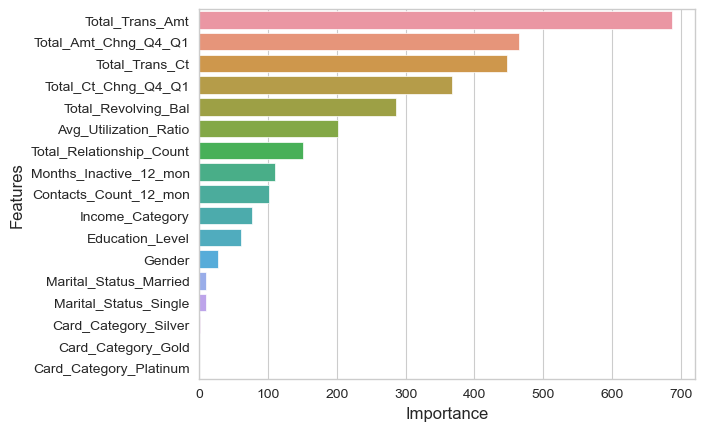

In [76]:
sns.barplot(x='Importance',y='Features',data=f_imp.sort_values(by=['Importance'],ascending=False))